# Testing the module

Here I test the baseline with K-cores.

## Basic miscellaneous tests

### Preprocessing + basicDrawing

In [1]:
import numpy as np
import scipy.sparse as sps
import networkx as nx
import kwextractor_miscellaneous as kwmisc #import the module
%matplotlib inline

In [2]:
with open("./data/test/coolExample.txt") as fin:
    raw = fin.read()
    
(words,txt)=kwmisc.NormalizeTextFromRaw(raw)
#print(txt)
#print(words)
gow_adj = kwmisc.BuildUndirectedGoW(txt,words, window=3)
gow = nx.Graph(gow_adj)

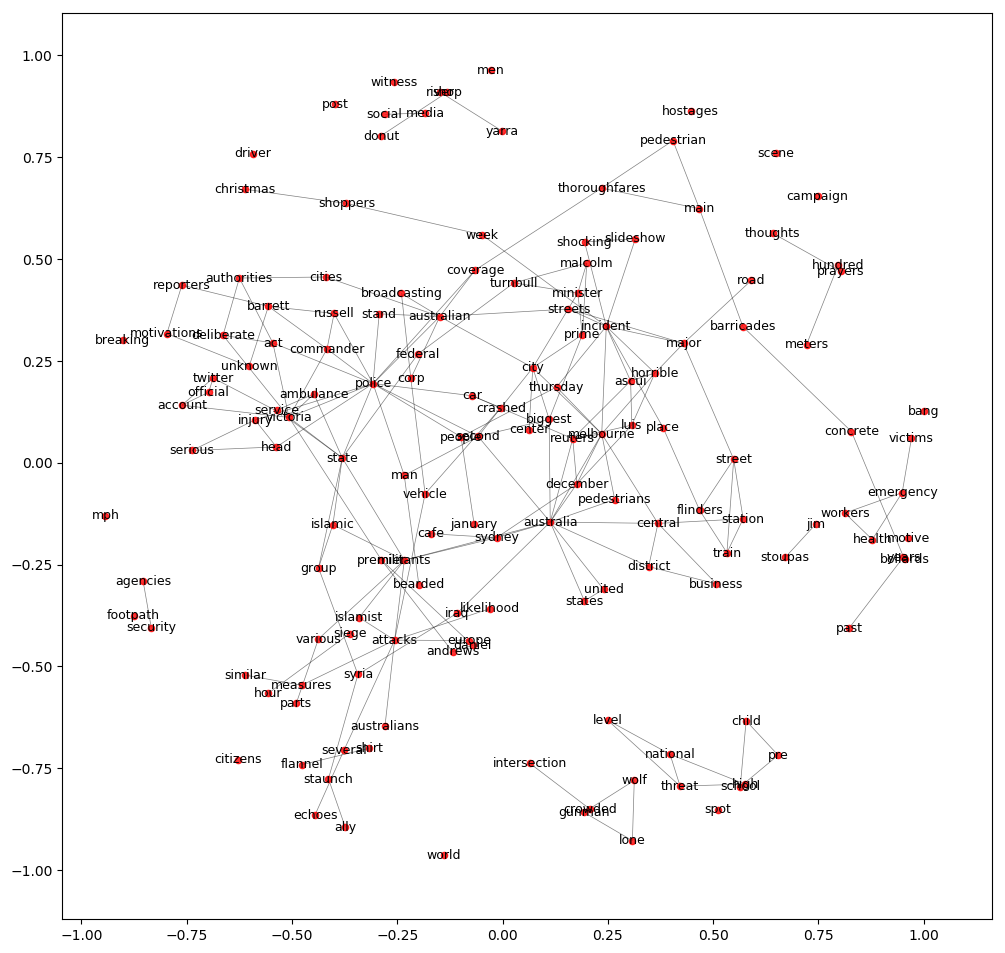

In [3]:
kwmisc.BasicDraw(gow,words)

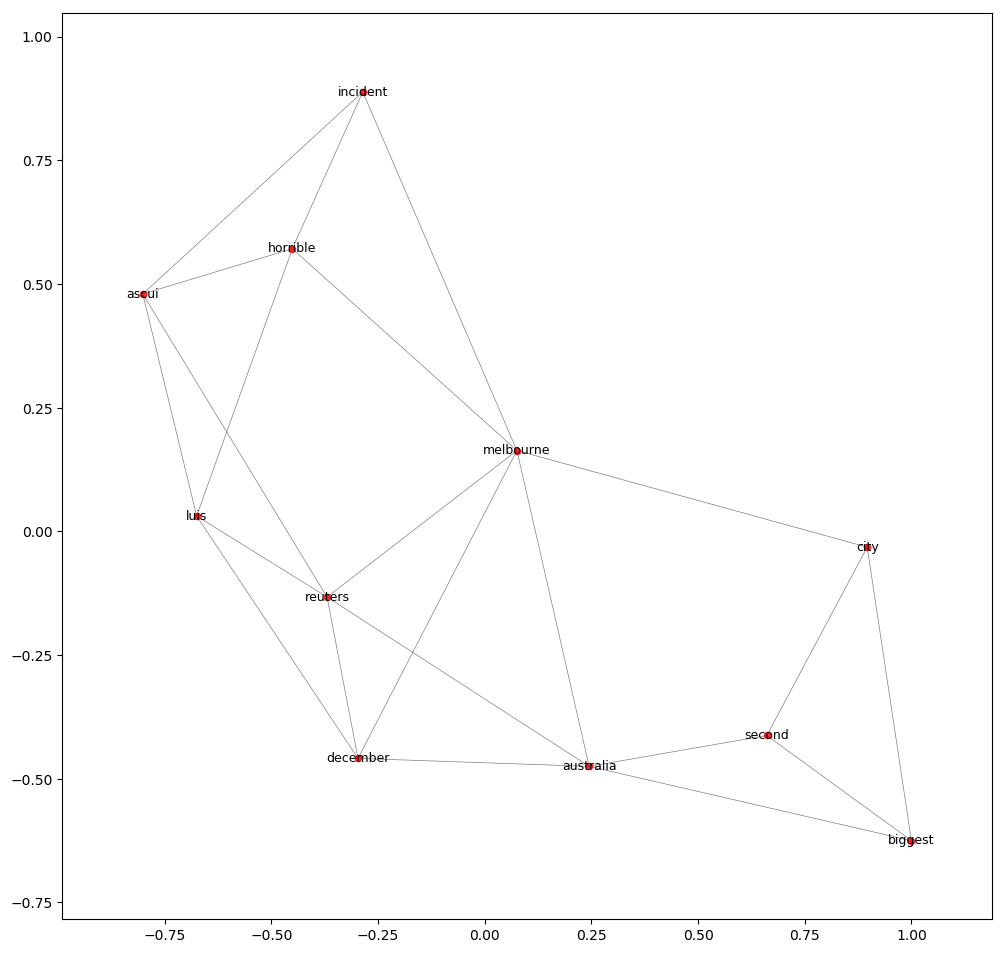

In [4]:
kcore=nx.algorithms.core.k_core(gow)
kwmisc.BasicDraw(kcore, list(words[kcore.nodes]))

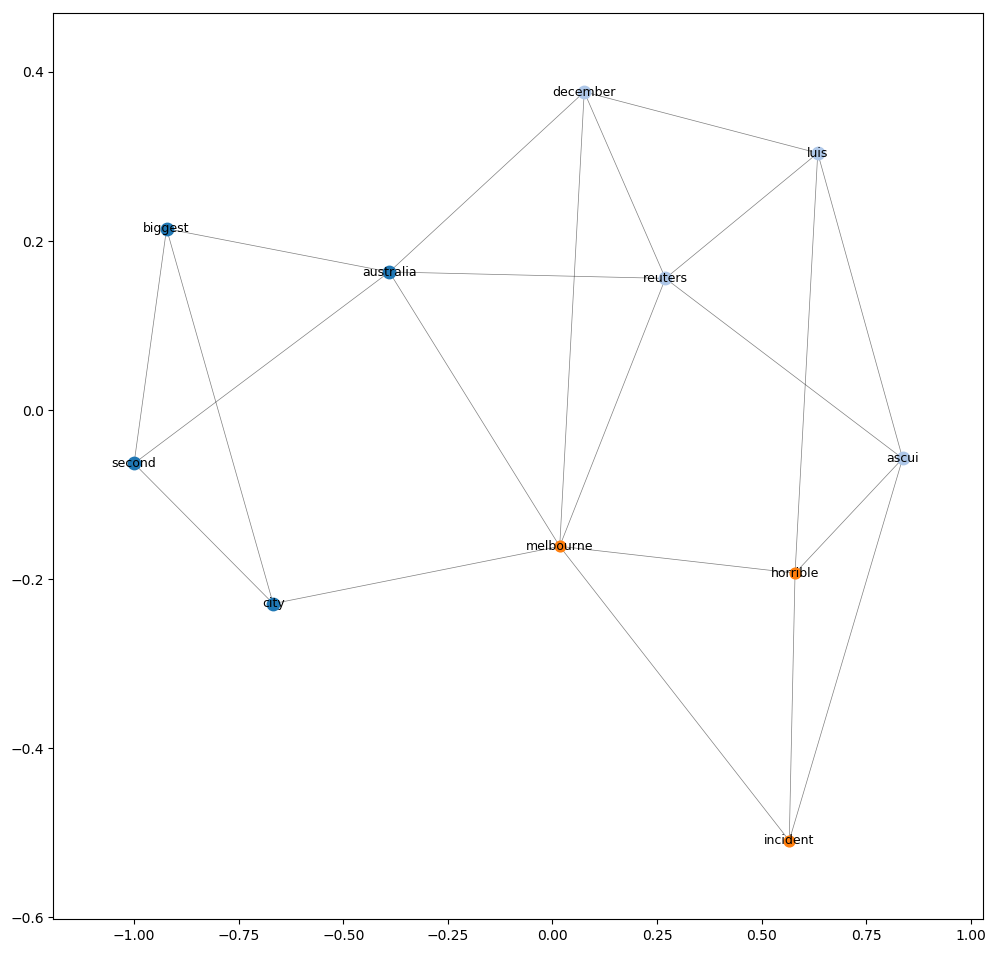

In [5]:
import matplotlib.pyplot as plt
import matplotlib
import community #python-louvain

communities=kwmisc.LouvainCommunitiesPlot(kcore,words[list(kcore.nodes)])

In [6]:
import collections

counterObj = collections.Counter(communities.values())
kwdCluster_id= counterObj.most_common(1)[0][0]
print(kwdCluster_id)
print(np.array(list(communities.values())))
print(np.where(np.array(list(communities.values()))==kwdCluster_id))
print(np.array(list(communities.keys()))[np.where(np.array(list(communities.values()))==kwdCluster_id)])
kwds = words[np.array(list(communities.keys()))[np.where(np.array(list(communities.values()))==kwdCluster_id)]]
print(kwds)

0
[1 1 1 0 0 2 0 2 2 1 0]
(array([ 3,  4,  6, 10], dtype=int64),)
[  8 106  16  30]
['australia' 'second' 'biggest' 'city']


## Final baseline method

In [7]:
import kwextractor_methods as kwmeth

In [19]:
with open("./data/test/reuters.txt") as fin:
    raw = fin.read()

kwds = kwmeth.LouvainExtractor(raw,window=3,verbose=False)
print(kwds)
#PICTURES ARE GREAT!!!!!!

['average' 'bitcoin' 'brokers' 'contract' 'contracts' 'contrast' 'experts'
 'february' 'front' 'full' 'futures' 'intermediaries' 'january' 'last'
 'launch' 'march' 'margin' 'market' 'month' 'old' 'p' 'refers'
 'requirement' 'requirements' 'session' 'sunday' 'trader' 'trading'
 'validity' 'volatility' 'week']


## Girvan-Newman with Choice of Best Modularity

In [9]:
import kwextractor_methods as kwmeth

In [18]:
with open("./data/test/reuters.txt") as fin:
    raw = fin.read()

kwds = kwmeth.GirvanNewmanExtractor(raw,window=3,verbose=False)
print(kwds)
#PICTURES ARE GREAT!!!!!! 

['validity' 'analysts' 'volatility' 'debut' 'week' 'bigger' 'bitcoin'
 'session' 'intermediaries' 'old' 'brokers' 'spot' 'stage' 'launch'
 'sunday' 'percent' 'full' 'contracts']


## Asynchroniuous Fluid Communities

In [11]:
import kwextractor_methods as kwmeth

In [17]:
with open("./data/test/reuters.txt") as fin:
    raw = fin.read()

kwds = kwmeth.FluidExtractor(raw,window=5,verbose=False)
print(kwds)
#PICTURES ARE GREAT!!!!!! 

['reception' 'analysts' 'reference' 'regulation' 'requirement' 'average'
 'big' 'bitstamp' 'secure' 'settlement' 'brokers' 'side' 'step' 'surge'
 'trader' 'contract' 'traditional' 'contrast' 'transactions' 'cryptography'
 'volatility' 'demand' 'difficult' 'digital' 'entry' 'exchanges' 'february'
 'final' 'financial' 'first' 'half' 'hidden' 'higher' 'hour' 'impossible'
 'institutional' 'intermediaries' 'investors' 'january' 'last' 'launch'
 'light' 'limits' 'lot' 'lukewarm' 'major' 'march' 'margin' 'multiple'
 'nice' 'open' 'p' 'percent' 'pressure' 'price']


## Pure kcore

In [13]:
import kwextractor_methods as kwmeth

In [16]:
with open("./data/test/reuters.txt") as fin:
    raw = fin.read()

kwds = kwmeth.kCoreExtractor(raw,window=3,verbose=False)
print(kwds)
#PICTURES ARE GREAT!!!!!! 

['global' 'reuters' 'rodrigo' 'bitcoin' 'brendan' 'swati' 'campos' 'cboe'
 'chavez' 'sydney' 'cme' 'contract' 'dado' 'u' 'margin' 'market' 'markets'
 'mcdermid' 'volume' 'min' 'month' 'york' 'new' 'dreyfuss' 'october'
 'exchange' 'pandey' 'file' 'front' 'photo' 'read' 'futures' 'ruvic'
 'gertrude']
